In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib
import glob
from math import sqrt
SPINE_COLOR = 'gray'

In [2]:
def latexify(fig_width=None, fig_height=None, columns=1):
    """Set up matplotlib's RC params for LaTeX plotting.
    Call this before plotting a figure.

    Parameters
    ----------
    fig_width : float, optional, inches
    fig_height : float,  optional, inches
    columns : {1, 2}
    """

    # code adapted from http://www.scipy.org/Cookbook/Matplotlib/LaTeX_Examples

    # Width and max height in inches for IEEE journals taken from
    # computer.org/cms/Computer.org/Journal%20templates/transactions_art_guide.pdf

    assert(columns in [1,2])

    if fig_width is None:
        fig_width = 3.39 if columns==1 else 6.9 # width in inches

    if fig_height is None:
        golden_mean = (sqrt(5)-1.0)/2.0    # Aesthetic ratio
        fig_height = fig_width*golden_mean # height in inches

    MAX_HEIGHT_INCHES = 8.0
    if fig_height > MAX_HEIGHT_INCHES:
        print("WARNING: fig_height too large:" + fig_height + 
              "so will reduce to" + MAX_HEIGHT_INCHES + "inches.")
        fig_height = MAX_HEIGHT_INCHES

    params = {'backend': 'pdf',
              'text.latex.preamble': ['\\usepackage{gensymb}'],
              'axes.labelsize': 8, # fontsize for x and y labels (was 10)
              'axes.titlesize': 8,
              'font.size': 8,       #'text.fontsize': 8, # was 10
              'legend.fontsize': 6.5, # was 10
              'xtick.labelsize': 8,
              'ytick.labelsize': 8,
              'lines.linewidth' : 0.4,
              'lines.markersize' : 0.4,
              'text.usetex': True,
              'figure.figsize': [fig_width,fig_height],
              'font.family': 'serif'
    }

    matplotlib.rcParams.update(params)


def format_axes(ax):

    for spine in ['top', 'right']:
        ax.spines[spine].set_visible(False)

    for spine in ['left', 'bottom']:
        ax.spines[spine].set_color(SPINE_COLOR)
        ax.spines[spine].set_linewidth(0.5)

    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')

    for axis in [ax.xaxis, ax.yaxis]:
        axis.set_tick_params(direction='out', color=SPINE_COLOR)

    return ax

linewidth=497
DPI=96
#latexify(fig_width=linewidth/DPI, fig_height=int(linewidth/2.3/DPI))
latexify(fig_width=linewidth/DPI/1.7, fig_height=int(linewidth/2.3/DPI))

In [ ]:
#PING: single experiment
#SCATTERPLOT - PING + rtt values over time
'''
for f in glob.iglob('./*1016-*/*firstKPIs', recursive=True): # /*directoryRegExp*/ to reduce output (long runtime)
    df = pd.read_csv(f, delim_whitespace=True, names = ['seconds_offset', 'cwin', 'bytes-in-flight', 'nb_ret', 
                                                        'rtt_min', 'current_rtt', 'send_time','reception_time', 
                                                        'ack_delay', 'srtt', 'rtt_var', 'state'])
                                                        # KPIs FROM BEFORE 18.10.2019!
                                                        
    #dping = pd.read_csv('./20191015-1314_1hr_ping/20191015-1314_client_ping_grep', delim_whitespace=True, 
                        names = ['seconds_offset', 'ping_number', 'ping_rtt'])
    
    df.current_rtt = df.current_rtt.apply(lambda x: x / 1000) #from us to ms
    df.srtt = df.srtt.apply(lambda x: x / 1000)
    title=f
    print(f)
    
    print(df.current_rtt.mean(),
          df.srtt.mean(),
          dping.ping_rtt.mean())
    
    
    fig = dping.plot(x="ping_number", y="ping_rtt", kind='scatter', color="DarkBlue", s=0.01)
    x = df.seconds_offset
    y1 = df.current_rtt
    fig.plot(x,y1,'r:') # more examples = 'b:' 'k:' 'r--'
    y2 = df.srtt
    fig.plot(x,y2, 'y:')

    axes = plt.gca()
    fig.legend(['Current RTT', 'Smoothed RTT', 'Ping RTT'])
    fig.set_xlabel('Runtime (seconds)')
    lines = fig.set_ylabel('Time (ms)')
    plt.tight_layout()
    plt.savefig(f+"_timing+ping.pdf")
    
    axes.set_ylim([0,250])
    #axes.set_xlim([-5,605])
    plt.savefig(f+"_timing+ping_limit.pdf")
'''

.\20191018-0857_100ms\firstKPIs
8.148370482010987 8.273929537346799
.\20191018-1201_100ms\firstKPIs
7.539376909216859 7.58263811503812
.\20191018-1519_100ms\firstKPIs
8.554843350436823 8.605691277215385


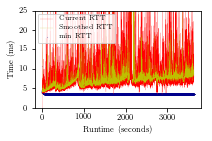

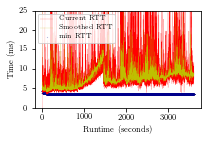

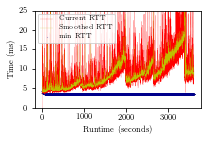

In [3]:
#SCATTERPLOT - rtt values over time
for f in glob.iglob('./*1018-*/*firstKPIs', recursive=True): # /*directoryRegExp*/ to reduce output (long runtime)
    df = pd.read_csv(f, delim_whitespace=True, names = ['seconds_offset', 'cwin', 'bytes-in-flight', 'nb_ret', 
                                                        'rtt_min', 'current_rtt', 'send_time','reception_time', 
                                                        'current_ackdelay', 'srtt', 'rtt_var', 'max_ackdelay', 'state']) 
                                                        #extraction of KPI: update from 18.10.19
        
    df.current_rtt = df.current_rtt.apply(lambda x: x / 1000) #from us to ms
    df.srtt = df.srtt.apply(lambda x: x / 1000)
    df.rtt_min = df.rtt_min.apply(lambda x: x / 1000)
    title=f
    print(f)
    
    print(df.current_rtt.mean(),
          df.srtt.mean())
    
    fig = df.plot(x="seconds_offset", y="rtt_min", kind='scatter', color="DarkBlue", s=0.01)
    x = df.seconds_offset
    y1 = df.current_rtt
    fig.plot(x,y1,'r:') # more examples = 'b:' 'k:' 'r--'
    y2 = df.srtt
    fig.plot(x,y2, 'y:')

    axes = plt.gca()
    fig.legend(['Current RTT', 'Smoothed RTT', 'min RTT'])
    fig.set_xlabel('Runtime (seconds)')
    lines = fig.set_ylabel('Time (ms)')
    plt.tight_layout()
    plt.savefig(f+"_timing.pdf")
    
    axes.set_ylim([0,25])
    #axes.set_xlim([-5,1000])
    plt.savefig(f+"_timing_limit.pdf")

.\20191018-0857_100ms\firstKPIs
.\20191018-1201_100ms\firstKPIs
.\20191018-1519_100ms\firstKPIs


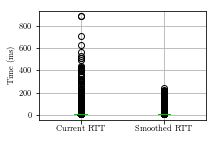

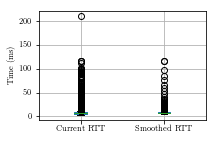

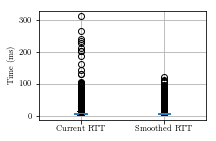

In [4]:
#BOXPLOTS - rtt values (Current RTT + Smoothed RTT)
# 1 plot for x files
for f in glob.iglob('./*1018-*/*firstKPIs', recursive=True): # /*directoryRegExp*/ to reduce output (long runtime)
    df = pd.read_csv(f, delim_whitespace=True, names = ['seconds_offset', 'cwin', 'bytes-in-flight', 'nb_ret', 
                                                        'rtt_min', 'current_rtt', 'send_time','reception_time', 
                                                        'current_ackdelay', 'srtt', 'rtt_var', 'max_ackdelay', 'state']) 
                                                        #extraction of KPI: update from 18.10.19
    df.current_rtt = df.current_rtt.apply(lambda x: x / 1000) #from us to ms
    df.srtt = df.srtt.apply(lambda x: x / 1000)
    title=f
    print(f)
    
    #delete unnecessary data
    df.drop(['seconds_offset', 'cwin', 'bytes-in-flight', 'nb_ret', 'rtt_min', 
             'send_time', 'reception_time', 'current_ackdelay', 'rtt_var','max_ackdelay', 'state'], axis=1, inplace=True)
    
    #delete initial values
    df.drop(df.index[0], inplace=True)
    
    fig = plt.figure() #this line makes a plot for every file
    fig = df.boxplot()
    plt.xticks([1, 2], ['Current RTT', 'Smoothed RTT'])
    fig.set_ylabel('Time (ms)')
    plt.tight_layout()
    plt.savefig(f+"_timing_boxplots.pdf")

.\20191018-0857_100ms\firstKPIs
.\20191018-1201_100ms\firstKPIs
.\20191018-1519_100ms\firstKPIs


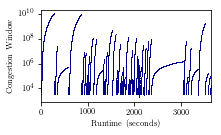

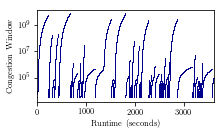

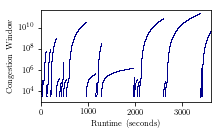

In [5]:
#SCATTERPLOT - congestion window
for f in glob.iglob('./*1018-*/*firstKPIs', recursive=True): # /*directoryRegExp*/ to reduce output (long runtime)
    df = pd.read_csv(f, delim_whitespace=True, names = ['seconds_offset', 'cwin', 'bytes-in-flight', 'nb_ret', 
                                                        'rtt_min', 'current_rtt', 'send_time','reception_time', 
                                                        'current_ackdelay', 'srtt', 'rtt_var', 'max_ackdelay', 'state']) 
                                                        #extraction of KPI: update from 18.10.19
    title=f
    print(f)
    
    fig = df.plot(x="seconds_offset", y="cwin", marker=",", markersize="0.01", color="DarkBlue", linestyle="None")

    axes = plt.gca()
    #axes.set_ylim([0,20])
    #axes.set_xlim([-5,605])
    axes.get_legend().remove()
    
    fig.set_xlabel('Runtime (seconds)')
    lines = fig.set_ylabel('Congestion Window')
    plt.tight_layout()
    plt.savefig(f+"_cwin.pdf")
    
    fig.set_yscale('log')
    plt.savefig(f+"_cwin_ylog.pdf")

.\20191018-0857_100ms\firstKPIs
Retransmissions = 102 

.\20191018-1201_100ms\firstKPIs
Retransmissions = 68 

.\20191018-1519_100ms\firstKPIs
Retransmissions = 34 



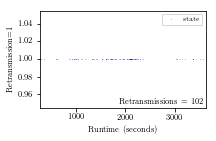

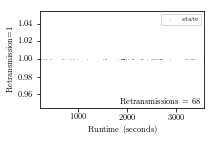

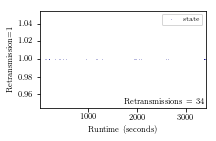

In [6]:
#SCATTERPLOT retransmissions over time
for f in glob.iglob('./*1018-*/*firstKPIs', recursive=True): # /*directoryRegExp*/ to reduce output (long runtime)
    df = pd.read_csv(f, delim_whitespace=True, names = ['seconds_offset', 'cwin', 'bytes-in-flight', 'nb_ret', 
                                                        'rtt_min', 'current_rtt', 'send_time','reception_time', 
                                                        'current_ackdelay', 'srtt', 'rtt_var', 'max_ackdelay', 'state']) 
                                                        #extraction of KPI: update from 18.10.19
    title=f
    print(f)
    
    df.drop_duplicates(subset="nb_ret", keep="first", inplace=True)
    df.drop(df.index[0], inplace=True)
    df.state = df.state.apply(lambda x: x - 14)
    
    num_retrans = 'Retransmissions = '+ str(df.state.count())
    print(num_retrans, "\n")
    
    fig = df.plot(x="seconds_offset", y="state", marker="x", markersize="0.1", color="DarkBlue", linestyle="None")
    
    fig.text(df['seconds_offset'].max()*0.75, 0.95, num_retrans, horizontalalignment='center', verticalalignment='center')
    fig.set_xlabel('Runtime (seconds)')
    lines = fig.set_ylabel('Retransmission=1')
    plt.tight_layout()
    plt.savefig(f+"_retransOverTime.pdf")


Retransmissions = 102 

Retransmissions = 68 

Retransmissions = 34 



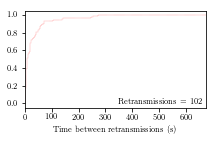

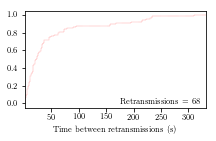

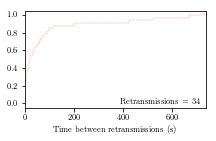

In [7]:
# CUMULATIVE DISTRIBUTION FUNCTION - time between retransmissions
# 1 plot for x files
for f in glob.iglob('./*1018-*/*firstKPIs', recursive=True): # /*directoryRegExp*/ to reduce output (long runtime)
    df = pd.read_csv(f, delim_whitespace=True, names = ['seconds_offset', 'cwin', 'bytes-in-flight', 'nb_ret', 
                                                        'rtt_min', 'current_rtt', 'send_time','reception_time', 
                                                        'current_ackdelay', 'srtt', 'rtt_var', 'max_ackdelay', 'state']) 
                                                        #extraction of KPI: update from 18.10.19
    title=f
    
    #delete the normal (no-retransmission) packets
    df.drop_duplicates(subset="nb_ret", keep="first", inplace=True)
    df.drop(df.index[0], inplace=True)
    df.state = df.state.apply(lambda x: x - 14)
    
    num_retrans = 'Retransmissions = '+ str(df.seconds_offset.count())
    print(num_retrans, "\n")
    
    #compute the time between retransmissions
    i = 0;
    timeBetween = [];
    for j in df['seconds_offset']:
        timeBetween.append(j-i)
        i = j
        
    df['timeBetween'] = timeBetween
    sortedRetrans = df['timeBetween'].sort_values()
    #print(sortedRetrans)
    #print(df.seconds_offset)
    
    #build the CDF
    cum_dist = np.linspace(0.,1.,len(sortedRetrans))
    cdf = pd.Series(cum_dist, index=sortedRetrans)
    fig = plt.figure() #this line makes a plot for every file
    fig = cdf.plot(color='r', linestyle=':', drawstyle='steps')
    
    fig.text(sortedRetrans.max()*0.75, 0, num_retrans, horizontalalignment='center', verticalalignment='center')

    fig.set_xlabel('Time between retransmissions (s)')
    plt.tight_layout()
    plt.savefig(f+"_cdf_retransTimeBetween.pdf")


Retransmissions = 102 

Retransmissions = 68 

Retransmissions = 34 



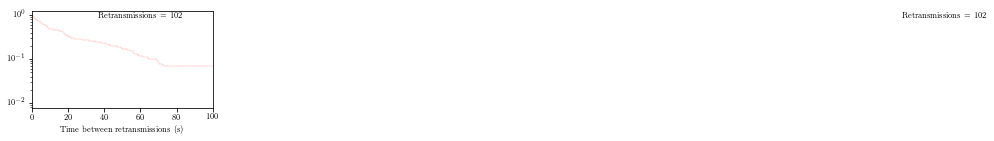

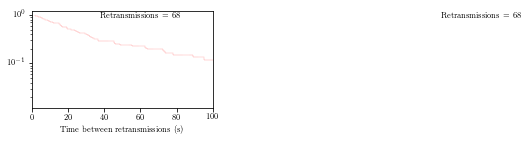

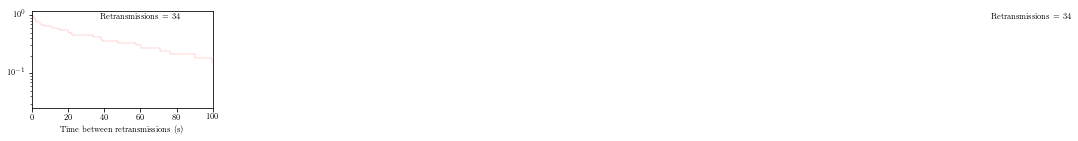

In [8]:
# COMPLEMENTARY CUMULATIVE DISTRIBUTION FUNCTION - time between retransmissions
# 1 plot for x files
for f in glob.iglob('./*1018-*/*firstKPIs', recursive=True): # /*directoryRegExp*/ to reduce output (long runtime)
    df = pd.read_csv(f, delim_whitespace=True, names = ['seconds_offset', 'cwin', 'bytes-in-flight', 'nb_ret', 
                                                        'rtt_min', 'current_rtt', 'send_time','reception_time', 
                                                        'current_ackdelay', 'srtt', 'rtt_var', 'max_ackdelay', 'state']) 
                                                        #extraction of KPI: update from 18.10.19
    title=f
    
    #delete the normal (no-retransmission) packets
    df.drop_duplicates(subset="nb_ret", keep="first", inplace=True)
    df.drop(df.index[0], inplace=True)
    df.state = df.state.apply(lambda x: x - 14)
    
    num_retrans = 'Retransmissions = '+ str(df.seconds_offset.count())
    print(num_retrans, "\n")
    
    #compute the time between retransmissions
    i = 0;
    timeBetween = [];
    for j in df['seconds_offset']:
        timeBetween.append(j-i)
        i = j
        
    df['timeBetween'] = timeBetween
    sortedRetrans = df['timeBetween'].sort_values()
    #print(sortedRetrans)
    #print(df.seconds_offset)
    
    #build the CDF
    cum_dist = np.linspace(1.,0.,len(sortedRetrans))
    cdf = pd.Series(cum_dist, index=sortedRetrans)
    fig = plt.figure() #this line makes a plot for every file
    fig = cdf.plot(color='r', linestyle=':', drawstyle='steps')
    
    fig.text(sortedRetrans.max()*0.75, 0.9, num_retrans, horizontalalignment='center', verticalalignment='center')

    fig.set_xlabel('Time between retransmissions (s)')
    plt.tight_layout()
    plt.savefig(f+"_ccdf_retransTimeBetween.pdf")
    
    fig.set_yscale('log')
    plt.savefig(f+"_ccdf_retransTimeBetween_ylog.pdf")
    
    axes = plt.gca() 
    axes.set_xlim([0,100])
    fig.text(60, 0.9, num_retrans, horizontalalignment='center', verticalalignment='center')
    plt.savefig(f+"_ccdf_retransTimeBetween_yloglim.pdf")

.\20191018-0857_100ms\firstKPIs
8.143358049616932 8.262010509721426 8.14818411372623 0.004826064109301104
       current_rtt  recept_send  deviation  current_ackdelay  max_ackdelay
2730         8.568       17.536      8.968             8.968         8.968
2903        10.815       19.375      8.560             8.560         8.968
3395        56.315       56.603      0.288             0.288         8.968
15219       15.487       16.671      1.184             1.184         8.968
20894       76.744       80.296      3.552             3.552         8.968
20895       76.744       80.296      3.552             3.552         8.968
21023      102.408      105.240      2.832             2.832         8.968
21099        9.938       13.338      3.400             3.400         8.968
21208       36.212       40.044      3.832             3.832         8.968
21218       37.252       41.084      3.832             3.832         8.968
23037        3.803        7.331      3.528             3.528         

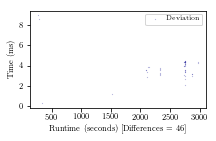

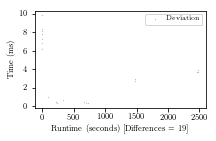

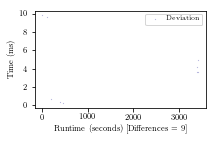

In [9]:
#SCATTERPLOT - rtt values over time
#COMPARISON to TIMING VALUES
for f in glob.iglob('./*1018-*/*firstKPIs', recursive=True): # /*directoryRegExp*/ to reduce output (long runtime)
    df = pd.read_csv(f, delim_whitespace=True, names = ['seconds_offset', 'cwin', 'bytes-in-flight', 'nb_ret', 
                                                        'rtt_min', 'current_rtt', 'send_time','reception_time', 
                                                        'current_ackdelay', 'srtt', 'rtt_var', 'max_ackdelay', 'state']) 
                                                        #extraction of KPI: update from 18.10.19
    #calculate the comparison value
    df['recept_send'] = df.reception_time - df.send_time
    df['deviation'] = df.recept_send - df.current_rtt
    df = df[df.state == 15] #only values after successful start are comparable (earlier, there is no send or reception time set)
    
    df.current_rtt = df.current_rtt.apply(lambda x: x / 1000) #from us to ms
    df.srtt = df.srtt.apply(lambda x: x / 1000)
    df.rtt_min = df.rtt_min.apply(lambda x: x / 1000)
    df.recept_send = df.recept_send.apply(lambda x: x / 1000)
    df.deviation = df.deviation.apply(lambda x: x / 1000)
    df.current_ackdelay = df.current_ackdelay.apply(lambda x: x / 1000)
    df.max_ackdelay = df.max_ackdelay.apply(lambda x: x / 1000)
    
    title=f
    print(f)
    
    print(df.current_rtt.mean(),
          df.srtt.mean(),
         df.recept_send.mean(),
         df.deviation.mean())
    
    standard = 0; #1 = standard plot over time
                  #0 = deviation plotted over time
    
    if(standard):
        fig = df.plot(x="seconds_offset", y="rtt_min", kind='scatter', color="DarkBlue", s=0.01)
        x = df.seconds_offset
        y1 = df.current_rtt
        fig.plot(x,y1,'r:') # more examples = 'b:' 'k:' 'r--'
        y2 = df.recept_send
        fig.plot(x,y2, 'y:')

        axes = plt.gca()
        fig.legend(['Current RTT', 'recept minus send', 'min RTT'])
        fig.set_xlabel('Runtime (seconds)')
        lines = fig.set_ylabel('Time (ms)')
        plt.tight_layout()
        plt.savefig(f+"_timing-comparison.pdf")
    
    #Plotting only deviation values
    else:
        df['deviation'] = df['deviation'].replace(0.0, np.nan) #set all 0.0 to NaN -> not plotted
        df.dropna(inplace=True)
        print(df[['current_rtt', 'recept_send', 'deviation', 'current_ackdelay', 'max_ackdelay']])
        fig = df.plot(x="seconds_offset", y="deviation", kind='scatter', color="DarkBlue", s=0.01)
        x = df.seconds_offset
        
        num_deviations = 'Differences = ' + str(df.deviation.count())
        print(num_deviations, "\n")
        #fig.text(df.seconds_offset.max()*0.9, df.deviation.max()*0.9, num_deviations, horizontalalignment='center', verticalalignment='center')

        axes = plt.gca()
        fig.legend(['Deviation'])
        fig.set_xlabel('Runtime (seconds)  [' + num_deviations + ']')
        lines = fig.set_ylabel('Time (ms)')
        plt.tight_layout()
        plt.savefig(f+"_timing-deviation_cleaned.pdf")